# Monty Hall problem
(fragments of code originally from pgmpy.org)

First make sure that all necessary libraries are installed and imported (more information about pgmpy, including tutorials, can be found on https://pgmpy.org/):

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

import networkx as nx
import matplotlib.pyplot as plt

---
The Monty Hall problem was just explained to you. Recall that there are three variables:

C, your choice of door

H, door opened by host

R, door with real prize

Each of these variables has 3 values (0,1,2) representing the three different doors.

---

We now first define the Bayesian network structure by passing the list of edges. We focus on the structure corresponding to option (IV) discussed.

If you do not agree with the corresponding (in)dependence assumptions, feel free to change this to a different structure by adding or removing edges. Note that this means you have to define different CPDs (Conditional Probability Distributions: these contain your network parameters) below as well!

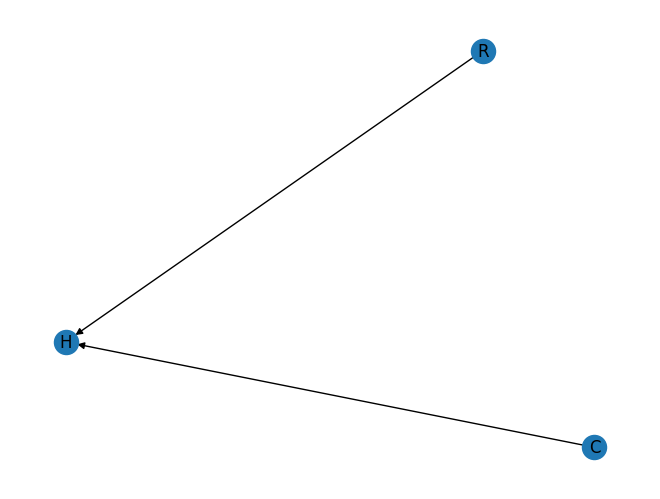

In [ ]:
# Define network structure:
bn = DiscreteBayesianNetwork()
bn.add_nodes_from(['C', 'H', 'R'])
bn.add_edges_from([('C','H'),('R','H')])

# Draw the last defined structure:
bngraph = nx.DiGraph(bn.edges())
nx.draw(bngraph, with_labels = True)
plt.show()

When the network structure is done, the associated (conditional) probability distributions have to be defined, using TabularCPD.

TabularCPD takes 5 arguments: the first is the variable name, followed by its cardinality (number of values), then a list with lists of probabilities; the evidence argument then provides a list of parents of the variable, followed by their cardinalities. The order in which the parents are listed in the evidence argument determines the order in which they are listed in the CPD: per value v of the variable (the columns in your table) there is a list of probabilities for v conditioned on all parent configurations (the rows in your table).

Let's add and check the CPDs for the defined structure.


In [ ]:
# Define the CPD for variable 'C'
cpd_c = TabularCPD('C', 3, [ [1/3],
                             [1/3],
                             [1/3]  ],
                   evidence=[],
                   evidence_card=[] )


# Define the CPD for variable 'R'
cpd_r = TabularCPD('R', 3, [ [1/3],
                             [1/3],
                             [1/3] ],
                   evidence=[],
                   evidence_card=[] )



# Define the CPD for variable 'H'
# order of parent configurations: C=0,R=0; C=1,R=0; C=2,R=0; C=0,R=1; C=1,R=1; C=2,R=1; C=0,R=2; C=1,R=2; C=2,R=2
cpd_h = TabularCPD('H', 3, [ [0,0,0,0,1/2,1,0,1,1/2],
                             [1/2,0,1,0,0,0,1,0,1/2],
                             [1/2,1,0,1,1/2,0,0,0,0] ],
                   evidence= ['C','R'],
                   evidence_card= [3,3] )



# Associate the CPDs with the network structure:
bn.add_cpds(cpd_c,cpd_r,cpd_h)

# Return the defined CPDs
for i in bn.get_cpds():
    print(i)

+------+----------+
| C(0) | 0.333333 |
+------+----------+
| C(1) | 0.333333 |
+------+----------+
| C(2) | 0.333333 |
+------+----------+
+------+----------+
| R(0) | 0.333333 |
+------+----------+
| R(1) | 0.333333 |
+------+----------+
| R(2) | 0.333333 |
+------+----------+
+------+------+------+------+------+------+------+------+------+------+
| C    | C(0) | C(0) | C(0) | C(1) | C(1) | C(1) | C(2) | C(2) | C(2) |
+------+------+------+------+------+------+------+------+------+------+
| R    | R(0) | R(1) | R(2) | R(0) | R(1) | R(2) | R(0) | R(1) | R(2) |
+------+------+------+------+------+------+------+------+------+------+
| H(0) | 0.0  | 0.0  | 0.0  | 0.0  | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(1) | 0.5  | 0.0  | 1.0  | 0.0  | 0.0  | 0.0  | 1.0  | 0.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(2) | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  | 0.0  | 0.0  | 0.0  | 0.0  |


**Question:** consider the probabilities specified in the CPDs. What assumptions underlie these numbers? Do you agree with them? Feel free to try some alternatives and see how that affects the probabilities that we will compute below. (Use the model check to verify that you still have a valid model if you do make changes.)

In [ ]:
# check the model structure and the associated CPDs: returns True if model syntax is correct otherwise throws an exception
bn.check_model()

True

Now that the model is specified, we can compute probabilities from it. We can enter evidence into the network:
- the door of your choice (e.g. C=0 for the first door; change below if you want), and
- the door opened by the host (e.g. H=2 for the third door; change below if you want).

Then we compute the posterior distribution over R given the evidence to determine which door is most likely to have the real prize behind it.


In [ ]:
# Inferring the posterior over R given C and H
infer = VariableElimination(bn)
posterior_r = infer.query(["R"], evidence={"C": 0, "H": 2})
print(posterior_r)

+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.3333 |
+------+----------+
| R(1) |   0.6667 |
+------+----------+
| R(2) |   0.0000 |
+------+----------+


**Question:** Are you going to switch doors?

Alternatively, we can also enter evidence for R and H and compute a posterior for C.

In [ ]:
# Inferring the posterior over C given R and H
posterior_c = infer.query(["C"], evidence={"R": 1, "H": 2})
print(posterior_c)

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6667 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.0000 |
+------+----------+


**Question:** What is the interpretation of this posterior?